In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
  
sns.set(color_codes=True)

In [3]:
df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\Edunoix\\Assignment Question\\Logistic Regression\\19 Aug\\Assignments\\insurance.csv")

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.shape

(1338, 7)

In [7]:
num_var_list=['age','children','bmi','charges']
cat_var_list=['sex','smoker','region']

In [8]:
def impute_na_num(df, variable):

    return df[variable].fillna(df[variable].mean())

In [9]:
for var in num_var_list:
    print(var)
    df[var] = impute_na_num(df, var)

age
children
bmi
charges


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
def impute_na_cat(df, variable):

    return df[variable].fillna(df[variable].mode().iloc[0])
    #return df[variable].fillna(df[variable].mode())

In [12]:
for var in cat_var_list:
    print(var)
    df[var] = impute_na_cat(df, var)

sex
smoker
region


In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
dummy=pd.get_dummies(df['region'],drop_first=True)
dummy1=pd.get_dummies(df['sex'],drop_first=True)

In [16]:
dummy

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [17]:
dummy1

,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [18]:
df=pd.concat([df,dummy,dummy1], axis=1)

In [19]:
df

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest,male
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,1
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,1,0


In [20]:
df=df.drop(["sex"], axis=1)

In [21]:
df=df.drop(["region"], axis=1)

In [22]:
df

,age,bmi,children,smoker,charges,northwest,southeast,southwest,male
0,19,27.900,0,yes,16884.92400,0,0,1,0
1,18,33.770,1,no,1725.55230,0,1,0,1
2,28,33.000,3,no,4449.46200,0,1,0,1
3,33,22.705,0,no,21984.47061,1,0,0,1
4,32,28.880,0,no,3866.85520,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,1,0,0,1
1334,18,31.920,0,no,2205.98080,0,0,0,0
1335,18,36.850,0,no,1629.83350,0,1,0,0
1336,21,25.800,0,no,2007.94500,0,0,1,0


In [23]:
df

,age,bmi,children,smoker,charges,northwest,southeast,southwest,male
0,19,27.900,0,yes,16884.92400,0,0,1,0
1,18,33.770,1,no,1725.55230,0,1,0,1
2,28,33.000,3,no,4449.46200,0,1,0,1
3,33,22.705,0,no,21984.47061,1,0,0,1
4,32,28.880,0,no,3866.85520,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,1,0,0,1
1334,18,31.920,0,no,2205.98080,0,0,0,0
1335,18,36.850,0,no,1629.83350,0,1,0,0
1336,21,25.800,0,no,2007.94500,0,0,1,0


In [24]:
dummy2=pd.get_dummies(df['smoker'],drop_first=True)

In [25]:
df=pd.concat([df,dummy2], axis=1)

In [26]:
df

,age,bmi,children,smoker,charges,northwest,southeast,southwest,male,yes
0,19,27.900,0,yes,16884.92400,0,0,1,0,1
1,18,33.770,1,no,1725.55230,0,1,0,1,0
2,28,33.000,3,no,4449.46200,0,1,0,1,0
3,33,22.705,0,no,21984.47061,1,0,0,1,0
4,32,28.880,0,no,3866.85520,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,1,0,0,1,0
1334,18,31.920,0,no,2205.98080,0,0,0,0,0
1335,18,36.850,0,no,1629.83350,0,1,0,0,0
1336,21,25.800,0,no,2007.94500,0,0,1,0,0


In [27]:
df=df.drop(["smoker"], axis=1)

In [28]:
df

,age,bmi,children,charges,northwest,southeast,southwest,male,yes
0,19,27.900,0,16884.92400,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,1,0,0,0
1336,21,25.800,0,2007.94500,0,0,1,0,0


In [29]:
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 42)

In [30]:
df_test

,age,bmi,children,charges,northwest,southeast,southwest,male,yes
764,45,25.175,2,9095.06825,0,0,0,0,0
887,36,30.020,0,5272.17580,1,0,0,0,0
890,64,26.885,0,29330.98315,1,0,0,0,1
1293,46,25.745,3,9301.89355,1,0,0,1,0
259,19,31.920,0,33750.29180,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
701,50,44.745,0,9541.69555,0,0,0,0,0
672,36,29.700,0,4399.73100,0,1,0,1,0
1163,18,28.215,0,2200.83085,0,0,0,0,0
1103,58,36.080,0,11363.28320,0,1,0,1,0


In [31]:
y_train = df_train.pop('charges')
X_train = df_train

In [32]:
X_train

,age,bmi,children,northwest,southeast,southwest,male,yes
332,61,31.160,0,1,0,0,0,0
355,46,27.600,0,0,0,1,1,0
138,54,31.900,3,0,1,0,0,0
381,55,30.685,0,0,0,0,1,1
292,25,45.540,2,0,1,0,1,1
...,...,...,...,...,...,...,...,...
1095,18,31.350,4,0,0,0,0,0
1130,39,23.870,5,0,1,0,0,0
1294,58,25.175,0,0,0,0,1,0
860,37,47.600,2,0,0,1,0,1


In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
#
regressor.coef_
regressor.intercept_
#
print('Slope:' ,regressor.coef_)
print('Intercept:', regressor.intercept_)

Slope: [  261.29692414   348.90691516   424.11912829  -486.93461047
  -970.96883857  -926.32290791   104.81182299 23628.36722236]
Intercept: -12373.963903035463


In [35]:
import statsmodels.api as sm

In [36]:
X_train_lm = sm.add_constant(X_train)

In [37]:
X_train_lm

,const,age,bmi,children,northwest,southeast,southwest,male,yes
332,1.0,61,31.160,0,1,0,0,0,0
355,1.0,46,27.600,0,0,0,1,1,0
138,1.0,54,31.900,3,0,1,0,0,0
381,1.0,55,30.685,0,0,0,0,1,1
292,1.0,25,45.540,2,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
1095,1.0,18,31.350,4,0,0,0,0,0
1130,1.0,39,23.870,5,0,1,0,0,0
1294,1.0,58,25.175,0,0,0,0,1,0
860,1.0,37,47.600,2,0,0,1,0,1


In [38]:
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     333.9
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          6.51e-267
Time:                        21:00:27   Log-Likelihood:                -9492.8
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     927   BIC:                         1.905e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.237e+04   1210.540    -10.222      0.0

In [39]:
y_test = df_test.pop('charges')
X_test = df_test

X_test_lm = sm.add_constant(X_test)

y_pred_lm = lr.predict(X_test_lm)

r2_test = r2_score(y_test, y_pred_lm)
print(r2_test)

0.769611805436901


<AxesSubplot:>

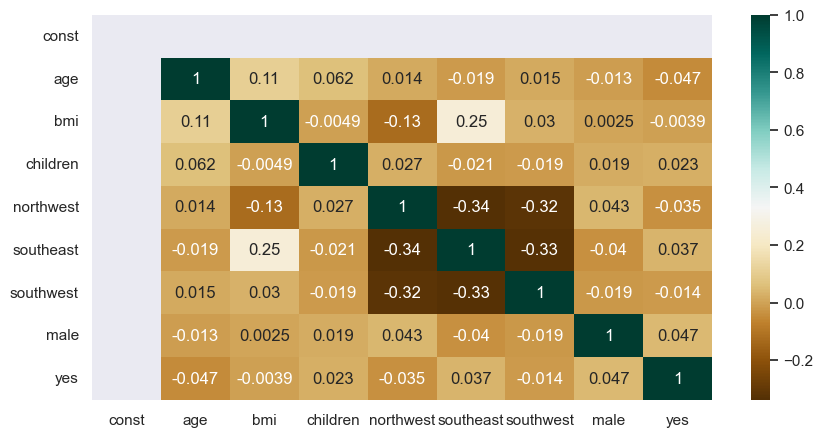

In [40]:
plt.figure(figsize=(10,5))
c= X_train_lm.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [41]:
#VIF Calcultions
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,36.00
5,southeast,1.59
6,southwest,1.49
4,northwest,1.48
2,bmi,1.10
1,age,1.02
3,children,1.01
7,male,1.01
8,yes,1.01


In [42]:
X_train_lm_1 = X_train_lm.drop(["male"], axis=1)

lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

#lr_1.params

print(lr_1.summary())

X_test_lm_1 = X_test_lm.drop(["male"], axis=1)
y_pred_test_lm_1 = lr_1.predict(X_test_lm_1)

r2_test_1 = r2_score(y_test, y_pred_test_lm_1)
print(r2_test_1)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     382.0
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          3.32e-268
Time:                        21:00:28   Log-Likelihood:                -9492.9
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     928   BIC:                         1.904e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.232e+04   1194.323    -10.319      0.0

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_1.values, i) for i in range(X_train_lm_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,35.08
5,southeast,1.59
6,southwest,1.49
4,northwest,1.47
2,bmi,1.10
1,age,1.02
3,children,1.01
7,yes,1.01


In [44]:
X_train_lm_2 = X_train_lm_1.drop(["northwest"], axis=1)

lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

lr_2.params

print(lr_2.summary())

X_test_lm_2 = X_test_lm_1.drop(["northwest"], axis=1)
y_pred_test_lm_2 = lr_2.predict(X_test_lm_2)

r2_test_2 = r2_score(y_test, y_pred_test_lm_2)

y_pred_train_lm_2 = lr_2.predict(X_train_lm_2)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     445.7
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          2.16e-269
Time:                        21:05:55   Log-Likelihood:                -9493.2
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     929   BIC:                         1.903e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.254e+04   1166.162    -10.755      0.0

In [45]:
X_train_lm_2 = X_train_lm_1.drop(["southwest"], axis=1)

lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

lr_2.params

print(lr_2.summary())

X_test_lm_2 = X_test_lm_1.drop(["southwest"], axis=1)
y_pred_test_lm_2 = lr_2.predict(X_test_lm_2)

r2_test_2 = r2_score(y_test, y_pred_test_lm_2)

y_pred_train_lm_2 = lr_2.predict(X_train_lm_2)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     444.5
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          5.48e-269
Time:                        21:06:56   Log-Likelihood:                -9494.2
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     929   BIC:                         1.904e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.258e+04   1184.602    -10.620      0.0

In [46]:
X_train_lm_2 = X_train_lm_1.drop(["northwest"], axis=1)

lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

lr_2.params

print(lr_2.summary())

X_test_lm_2 = X_test_lm_1.drop(["northwest"], axis=1)
y_pred_test_lm_2 = lr_2.predict(X_test_lm_2)

r2_test_2 = r2_score(y_test, y_pred_test_lm_2)

y_pred_train_lm_2 = lr_2.predict(X_train_lm_2)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     445.7
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          2.16e-269
Time:                        21:07:35   Log-Likelihood:                -9493.2
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     929   BIC:                         1.903e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.254e+04   1166.162    -10.755      0.0

In [47]:
X_train_lm_2 = X_train_lm_1.drop(["southwest"], axis=1)

lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

lr_2.params

print(lr_2.summary())

X_test_lm_2 = X_test_lm_1.drop(["southwest"], axis=1)
y_pred_test_lm_2 = lr_2.predict(X_test_lm_2)

r2_test_2 = r2_score(y_test, y_pred_test_lm_2)

y_pred_train_lm_2 = lr_2.predict(X_train_lm_2)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     444.5
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          5.48e-269
Time:                        21:08:16   Log-Likelihood:                -9494.2
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     929   BIC:                         1.904e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.258e+04   1184.602    -10.620      0.0

In [48]:
X_train_lm_2 = X_train_lm_1.drop(["northwest"], axis=1)

lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

lr_2.params

print(lr_2.summary())

X_test_lm_2 = X_test_lm_1.drop(["northwest"], axis=1)
y_pred_test_lm_2 = lr_2.predict(X_test_lm_2)

r2_test_2 = r2_score(y_test, y_pred_test_lm_2)

y_pred_train_lm_2 = lr_2.predict(X_train_lm_2)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     445.7
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          2.16e-269
Time:                        21:09:23   Log-Likelihood:                -9493.2
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     929   BIC:                         1.903e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.254e+04   1166.162    -10.755      0.0

In [49]:
X_train_lm_2 = X_train_lm_1.drop(["southwest"], axis=1)

lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

lr_2.params

print(lr_2.summary())

X_test_lm_2 = X_test_lm_1.drop(["southwest"], axis=1)
y_pred_test_lm_2 = lr_2.predict(X_test_lm_2)

r2_test_2 = r2_score(y_test, y_pred_test_lm_2)

y_pred_train_lm_2 = lr_2.predict(X_train_lm_2)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     444.5
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          5.48e-269
Time:                        21:16:01   Log-Likelihood:                -9494.2
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     929   BIC:                         1.904e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.258e+04   1184.602    -10.620      0.0